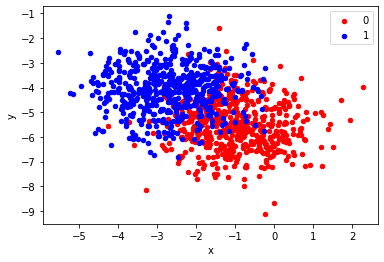

In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X_train1, y_train1 = make_blobs(n_samples=1100, centers=2, n_features=2, shuffle=True, random_state=300)
# scatter plot, dots colored by class value
train1 = DataFrame(dict(x=X_train1[:,0], y=X_train1[:,1], label=y_train1))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = train1.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [2]:
print("Number of samples in X_train : {}" .format(len(X_train1)))
print("Number of samples in y_train : {}" .format(len(y_train1)))

Number of samples in X_train : 1100
Number of samples in y_train : 1100


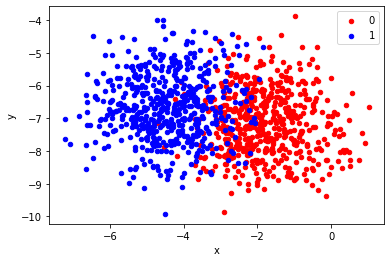

In [3]:
X_test1, y_test1 = make_blobs(n_samples=1100, centers=2, n_features=2, shuffle=True, random_state=322)
# scatter plot, dots colored by class value
test1 = DataFrame(dict(x=X_test1[:,0], y=X_test1[:,1], label=y_test1))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = test1.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [4]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Finding Best K value and displaying training and test classification accuracy values in a plot
k_range = range(1, 35, 2)

# Testing and Testing accuracy
testing_accuracy_scores=[]
training_accuracy_scores=[]

best_k = 0
max_val = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    
    y_training_pred = knn.predict(X_train1)
    train_score = metrics.accuracy_score(y_train1, y_training_pred)
    training_accuracy_scores.append(train_score)

    y_test_pred = knn.predict(X_test1)
    test_score = metrics.accuracy_score(y_test1, y_test_pred)
    testing_accuracy_scores.append(test_score)
    
    if test_score > max_val:
        max_val = test_score;
        best_k = k;

KNN Train Test Accuracy with respect to K


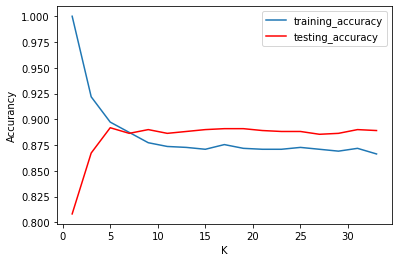

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

print("KNN Train Test Accuracy with respect to K")

plt.plot(k_range, training_accuracy_scores, label = "training_accuracy")
plt.plot(k_range, testing_accuracy_scores,color="red", label = "testing_accuracy")
plt.xlabel("K")
plt.ylabel("Accurancy")
plt.legend()
plt.show()

In [6]:
print("Best K = ", best_k)

Best K =  5


In [7]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train1, y_train1)

y_train_pred = knn_model.predict(X_train1)
print("Training accuracy for best K = ", metrics.accuracy_score(y_train1, y_train_pred))

Training accuracy for best K =  0.8972727272727272


In [8]:
y_test_pred = knn_model.predict(X_test1)
testAccuracy = metrics.accuracy_score(y_test1, y_test_pred)
print("Test accuracy for best K = ", testAccuracy)

Test accuracy for best K =  0.8918181818181818


# COMMENT:

In all three of the data sets, I created a linear and non-noise data as training data. So I would be able to find more precise k values. For the first date set, I created a test data that is close to linear but has noise. Training and test data has 1100 pieces of data. As can be seen from the graph here, the best K value was 5 because neither overfit nor underfit was formed for training data and test data. There is an underfit situation for values less than 5 in the chart. Here the bias is low while the variance is high. Values higher than 5 are not too bad. Values greater than 5 have a higher bias than values less than 5, but a lower variance. As the number of data increases, the best k value increases. Training accuracy and test accuracy are almost unchanged.

In [9]:
train1.describe()

,x,y,label
count,1100.000000,1100.000000,1100.000000
mean,-1.850827,-4.808851,0.500000
std,1.295684,1.230416,0.500227
min,-5.543785,-9.121395,0.000000
25%,-2.769802,-5.752556,0.000000
50%,-1.835583,-4.778987,0.500000
75%,-0.955043,-3.918791,1.000000
max,2.266762,-1.113194,1.000000


In [10]:
test1.describe()

,x,y,label
count,1100.000000,1100.000000,1100.000000
mean,-3.121363,-6.894779,0.500000
std,1.664265,1.023491,0.500227
min,-7.229540,-9.924275,0.000000
25%,-4.466110,-7.641753,0.000000
50%,-3.031200,-6.917512,0.500000
75%,-1.862413,-6.197566,1.000000
max,1.025693,-3.883310,1.000000


In [11]:
X_train1_desc = train1.x.describe()
X_train1_desc

count    1100.000000
mean       -1.850827
std         1.295684
min        -5.543785
25%        -2.769802
50%        -1.835583
75%        -0.955043
max         2.266762
Name: x, dtype: float64

In [12]:
from sklearn import preprocessing

scaler = preprocessing.RobustScaler().fit(X_train1)

X_train1_scaled = scaler.transform(X_train1)
X_train1_scaled

array([[ 0.20124992,  1.274339  ],
       [-0.77630549,  0.52045789],
       [-0.30989301, -0.0045235 ],
       ...,
       [ 0.80316071, -0.39248866],
       [-0.54399796,  0.402876  ],
       [ 0.58568422, -0.44893319]])

In [13]:
X_test1_scaled = scaler.transform(X_test1)
X_test1_scaled

array([[-1.02123676, -0.72086783],
       [-0.82017925, -0.27248312],
       [-1.50853018, -0.34798786],
       ...,
       [-0.35968675, -1.12403392],
       [-1.57885696, -1.29172921],
       [-0.18985354, -1.27386032]])

In [14]:
# Finding Best K value and displaying training and test classification accuracy values in a plot
testing_accuracy_scores=[]
training_accuracy_scores=[]

best_k = 0
max_val = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1_scaled, y_train1)
    
    y_training_pred = knn.predict(X_train1_scaled)
    train_score = metrics.accuracy_score(y_train1, y_training_pred)
    training_accuracy_scores.append(train_score)

    y_test_pred = knn.predict(X_test1_scaled)
    test_score = metrics.accuracy_score(y_test1, y_test_pred)
    testing_accuracy_scores.append(test_score)
    
    if test_score > max_val:
        max_val = test_score;
        best_k = k;

KNN Train Test Accuracy with respect to K on scaled data


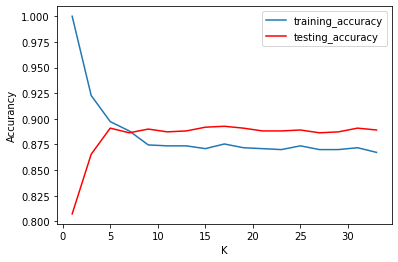

In [15]:
print("KNN Train Test Accuracy with respect to K on scaled data")

plt.plot(k_range, training_accuracy_scores, label = "training_accuracy")
plt.plot(k_range, testing_accuracy_scores,color="red", label = "testing_accuracy")
plt.xlabel("K")
plt.ylabel("Accurancy")
plt.legend()
plt.show()

In [16]:
print("Best K on scaled data = ", best_k)

Best K on scaled data =  17


In [17]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train1_scaled, y_train1)

y_train_pred = knn_model.predict(X_train1_scaled)
print("Training accuracy for best K on scaled data = ", metrics.accuracy_score(y_train1, y_train_pred))

Training accuracy for best K on scaled data =  0.8754545454545455


In [18]:
y_test_pred = knn_model.predict(X_test1_scaled)
testScaledAccuracy = metrics.accuracy_score(y_test1, y_test_pred);
print("Test accuracy for best K on scaled data = ", testScaledAccuracy)

Test accuracy for best K on scaled data =  0.8927272727272727


In [19]:
print("Test accuracy for best K on original (unscaled data) = ", testAccuracy)

increaseInAccuracy = 100 * (testScaledAccuracy - testAccuracy)
print("Increase due to scaling on test accuracy  = ",round(increaseInAccuracy, 2), "%")

Test accuracy for best K on original (unscaled data) =  0.8918181818181818
Increase due to scaling on test accuracy  =  0.09 %
